# TP Regression Linéaire - Enoncé

# PAR : MINTSA-MI OBAME DIMITRI

#### Data set: 

Lien du dataset: https://www.kaggle.com/datasets/gauravduttakiit/bike-sharing

Cet ensemble de données contient le nombre horaire et quotidien de location des vélos  entre les années 2011 et 2012 dans un système de partage de vélo avec les informations météorologiques et saisonnières correspondantes.

Plus d'informations sur les données:

Un système de partage de vélos est un service dans lequel des vélos sont mis à disposition pour un usage partagé par des particuliers sur une courte durée, moyennant un prix ou gratuitement. De nombreux systèmes de partage de vélos permettent aux utilisateurs d'emprunter un vélo sur un « dock » qui est généralement contrôlé par ordinateur, dans lequel l'utilisateur saisit les informations de paiement et le système les déverrouille. Ce vélo pourra ensuite être restitué sur un autre quai appartenant au même système.

Les systèmes de partage de vélos sont une nouvelle génération de locations de vélos traditionnelles où l'ensemble du processus depuis l'adhésion, la location et le retour est devenu automatique. Grâce à ces systèmes, l'utilisateur peut facilement louer un vélo à partir d'une position particulière et revenir à une autre position. Il existe actuellement plus de 500 programmes de partage de vélos dans le monde, composés de plus de 500 000 vélos. Aujourd’hui, ces systèmes suscitent un grand intérêt en raison de leur rôle important dans les problèmes de circulation, d’environnement et de santé.


Outre les applications intéressantes des systèmes de partage de vélos dans le monde réel, les caractéristiques des données générées par ces systèmes les rendent attrayantes pour la recherche. Contrairement à d’autres services de transport comme le bus ou le métro, la durée du trajet, la position de départ et d’arrivée sont explicitement enregistrées dans ces systèmes. Cette fonctionnalité transforme le système de partage de vélos en un réseau de capteurs virtuels pouvant être utilisé pour détecter la mobilité dans la ville. Par conséquent, on s’attend à ce que la plupart des événements importants survenus dans la ville puissent être détectés grâce à la surveillance de ces données.

#### Enoncé:

Dans ce TP, on s'intéresse à prédire la demande de vélos en fonction des variables indépendantes disponibles. 
Le modèle entrainé sera utilisé par la direction pour comprendre exactement comment les demandes varient selon les différentes fonctionnalités. Ils peuvent en conséquence manipuler la stratégie commerciale pour répondre aux niveaux de demande et répondre aux attentes du client. De plus, le modèle constituera un bon moyen pour la direction de comprendre la dynamique de la demande d’un nouveau marché.

On voudrait répondre aux questions: 
 + Quelles variables sont significatives pour prédire la demande de vélos partagés ?
 + Dans quelle mesure ces variables décrivent-elles les demandes en vélo?

Pour cela, nous désirons dans ce TP entrainer un modèle de regression linéaire pour prédire la demande de vélo.



#### Étapes à réaliser :

    1. Importation des bibliothèques et chargement des données
        
    2. Exploration visualisation des données
                
    3. Suppression des colonnes inutiles et dupliquées
        
    4. Gestion de valeurs manquantes
        
    5. Sélection de variables par corrélation
        
    6. Transformation de variables

    7. Division des données

    8. Modélisation de la régression linéaire

    9. Évaluation du modèle 
    
    10. Interprétation des résultats

    11. Optimisation du modèle

Variables description

    - instant: record index

	- dteday : date

	- season : season (1:winter, 2:spring, 3:summer, 4:fall)

	- yr : year (0: 2018, 1:2019)

	- mnth : month ( 1 to 12)

	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

	- weekday : day of the week

	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

	+ weathersit : 

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy

		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

	- hum: Normalized humidity. The values are divided to 100 (max)

	- windspeed: Normalized wind speed. The values are divided to 67 (max)

	- casual: count of casual users

	- registered: count of registered users

	- cnt: count of total rental bikes including both casual and registered

    Var Name  Role	   Type	       Description
    
    instant	  ID	    Integer		record index		
    dteday	  Feature	Date		date		
    season	  Feature	Categorical		1:winter, 2:spring, 3:summer, 4:fall		
    yr	      Feature	Categorical		year (0: 2011, 1: 2012)		
    mnth	  Feature	Categorical		month (1 to 12)		
    holiday   Feature	Binary		weather day is holiday or not 
    weekday	  Feature	Categorical		day of the week		
    workingday Feature	Binary		if day is neither weekend nor holiday is 1, otherwise is 0		
    weathersiteFeature	Categorical		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy		
    temp	   Feature	Continuous		Normalized temperature in Celsius. 
    atemp	   Feature	Continuous		Normalized feeling temperature in Celsius. 
    hum        Feature	Continuous		Normalized humidity. The values are divided to 100 (max)	
    windspeed  Feature	Continuous		Normalized wind speed. The values are divided to 67 (max)	
    casual	   Other	Integer		count of casual users		
    registered Other	Integer		count of registered users		
    cnt        Target	Integer		count of total rental bikes including both casual and registered		

Remarque
cnt = casual + registred

###   1. Importation des bibliothèques et chargement des données :
        Importez les bibliothèques nécessaires et chargez le jeu de données.


In [262]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
# Chargement des données
df = pd.read_csv("day.csv")

### 2. Exploration et visualisation des données :
        Explorez les caractéristiques du jeu de données. 
        Identifier les variables catégoriques des variables numériques 
        Visualiser les distributions des variables


In [265]:
# 5 premières lignes du dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [266]:
# Statistiques générales 
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [267]:
# Colonnes
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [268]:
# Dimensions
df.shape

(730, 16)

In [269]:
# Variables numériques et catégoriques
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Variables catégoriques :", categorical_columns)
print("Variables numériques :", numeric_columns)

Variables catégoriques : Index(['dteday'], dtype='object')
Variables numériques : Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


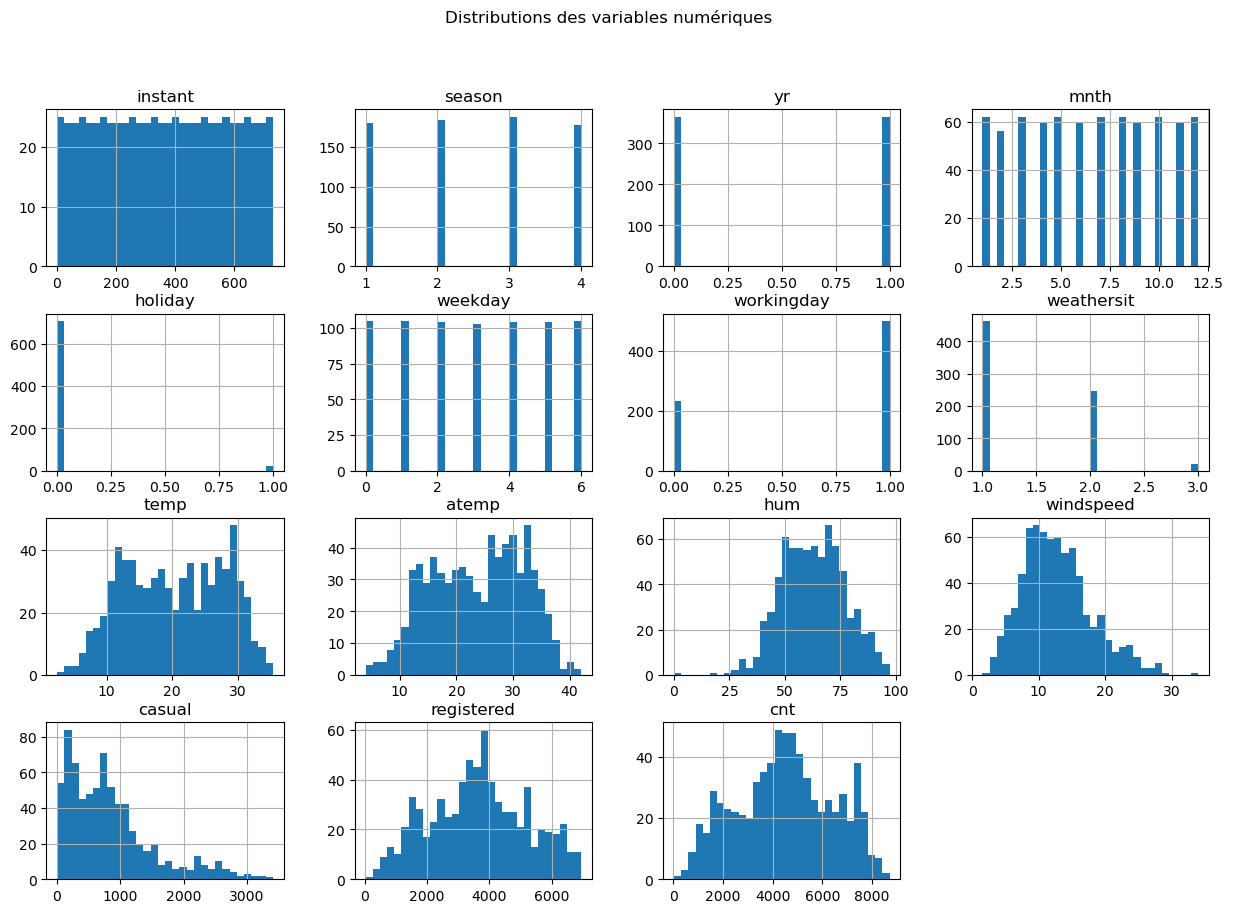

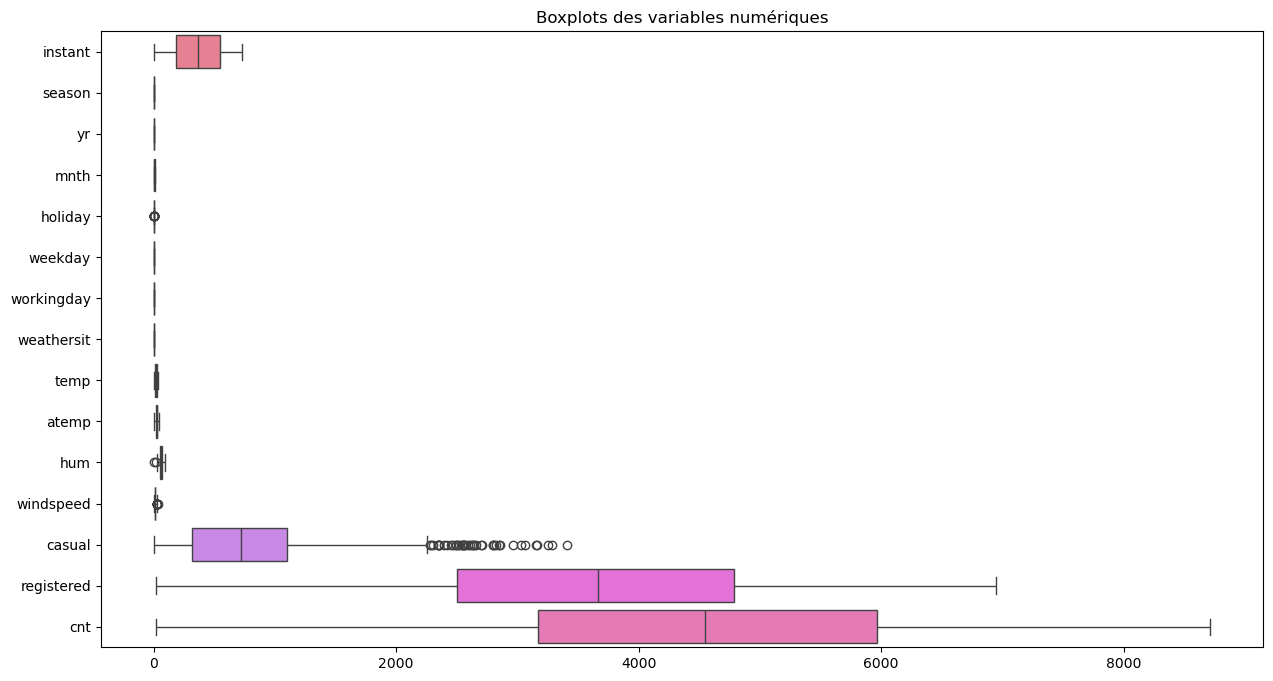

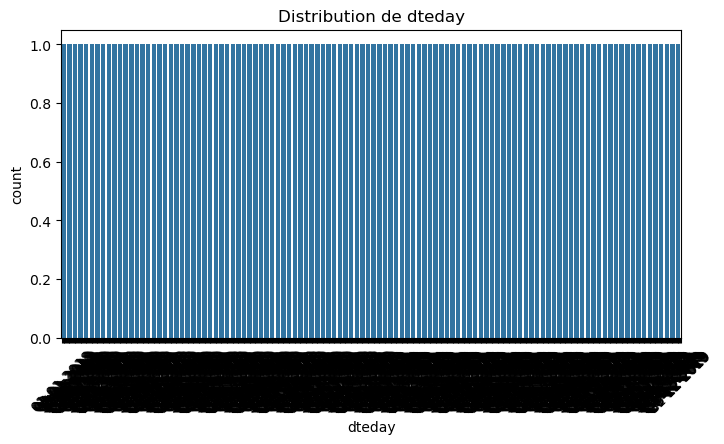

In [270]:
# Visualisation des distributions des variables numériques
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distributions des variables numériques")
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_columns], orient="h")
plt.title("Boxplots des variables numériques")
plt.show()

# Visualisation des distributions des variables catégoriques
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.show()

### 3. Suppression des colonnes inutiles et dupliquées:
       
    On supprime la colonne instant qui correspond à l'Id
    On supprime aussi les colonnes redondantes: 
        + Observer 'dteday' et 'year', 'month'
        + Observer 'casual' et 'registered' avec la variable cicle 'cnt'
           
           

In [272]:
# Suppression des colonnes inutiles et redondantes 
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [273]:
# Vérification
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 4. Gestion de valeurs manquantes :
         Y a t il des valeurs manquantes? si oui, définir puis appliquer votre politique de gestion des valeurs manquantes.

In [275]:
# Vérification s'il y a des valeurs manquantes
print(df.isnull().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


Il n'y a aucune valeur manquante

In [277]:
# Vérification des valeurs en double
if df.duplicated().any():
    print('Il existe des valeurs doubles')
else:
    print('Aucune valeur double')

Aucune valeur double


### 5. Sélection de variables par corrélation
    Etudier les correlation des variables.
    
    Définir une liste de variables à selectionner pour prédire la variable 'cnt'

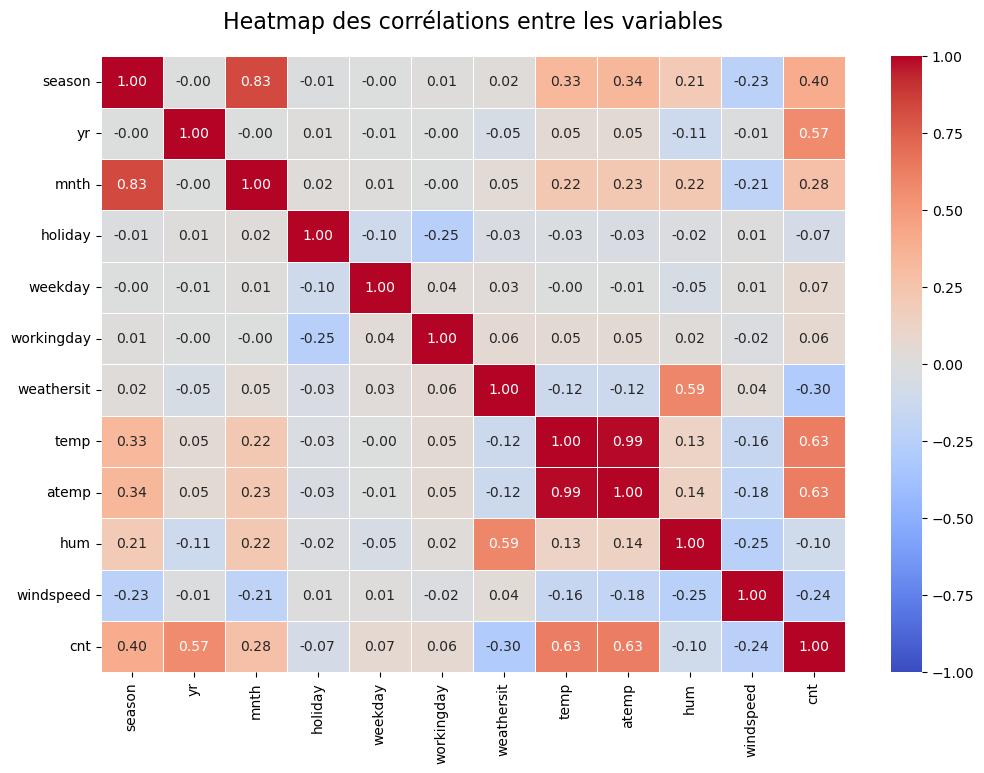

In [279]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(
    correlation_matrix,     
    annot=True,             
    cmap='coolwarm',     
    fmt=".2f",             
    linewidths=0.5,
    vmin=-1, vmax=1     
)

# Ajout d'un titre
plt.title("Heatmap des corrélations entre les variables", fontsize=16, pad=20)

# Affichage
plt.show()

Variables fortement corrélées avec cnt :

temp : Corrélation de 0.63.

atemp : Corrélation de 0.63.

yr : Corrélation de 0.57.

season : Corrélation de 0.40.

weathersit : Corrélation de -0.30 (négative).

Remarque : atemp est redondante avec temp donc on garde ici temp

Après étude de corrélation, la liste des variables à séléctionner est:
['', '', '', '', '']

['temp', 'yr', 'season', 'weathersit']

#### 6. Transformation de variables:
        Effectuer les transformations de variables necessaires sur les variables catégorielles et les variables numériques.


In [285]:
# Liste des variables catégorielles à encoder
categorical_columns = ['season', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit']

# Utilisation de get_dummies pour encoder les variables catégorielles
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Affichage des premières lignes du DataFrame encodé pour vérifier
df_encoded.head()

,yr,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday_1,workingday_1,weathersit_2,weathersit_3
0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,0,14.902598,17.68695,69.6087,16.652113,801,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,0,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


#### 7. Division des données :
        Définir notre X et y
        Divisez les données en ensembles d'entraînement et de test, de sorte à considérer 20% de données pour le test. 

In [287]:
from sklearn.model_selection import train_test_split

# Définition de X et y
X = df_encoded  
y = df['cnt']   # Variable cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des dimensions des ensembles
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)

# Affichage des premières lignes de X_train pour vérifier
X_train.head()

Dimensions de X_train : (584, 30)
Dimensions de X_test : (146, 30)
Dimensions de y_train : (584,)
Dimensions de y_test : (146,)


,yr,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday_1,workingday_1,weathersit_2,weathersit_3
247,0,27.606653,31.28230,79.0417,14.250632,3351,False,True,False,False,...,True,False,False,False,False,False,True,False,True,False
335,0,12.880847,16.57165,62.5833,6.750518,3940,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
702,1,19.509153,23.45270,73.3750,11.666643,6606,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
440,1,21.080847,25.25230,75.5833,7.417168,7836,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
136,0,23.028347,26.92645,83.7917,18.582718,4123,True,False,False,False,...,False,True,False,False,False,False,False,True,True,False


#### 8. Modélisation de la régression linéaire :
        Utilisez la classe LinearRegression de scikit-learn pour créer un modèle de régression linéaire.
        Entraînez le modèle sur l'ensemble d'entraînement.
        1. Considérer dans un premier temps toutes les variables
        2. Condidérer les variables selectionnées par étude de corrélation
        3. Considérer les variables selectionnées par une autre méthode de feature selection
        Comparer les performances des différents modèles dans la question suivante


In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Définition des variables explicatives et de la variable cible
X = df_encoded  # Toutes les variables encodées
y = df['cnt']  # Variable cible

# Séparation des données en ensembles d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse_all = mean_squared_error(y_test, y_pred)
r2_all = r2_score(y_test, y_pred)


In [290]:
# Sélection des variables spécifiques par corrélation
variables_selected = ['temp', 'yr', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']
X = df_encoded[variables_selected]  # Variables sélectionnées
y = df['cnt']  # Variable cible

# Séparation des données en ensembles d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse_corr = mean_squared_error(y_test, y_pred)
r2_corr = r2_score(y_test, y_pred)

# Analyse des coefficients du modèle
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

In [291]:
from sklearn.linear_model import Lasso

# Définition de X et y
X = df_encoded  # Utilisation de l'ensemble complet des données encodées
y = df['cnt']   # Variable cible

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle Lasso
lasso = Lasso(alpha=0.01) 

# Entraînement du modèle sur les données d'entraînement
lasso.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_lasso = lasso.predict(X_test)

# Calcul des performances
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


#### 9. Evaluation du modèle :
Faites une évaluation des modèles de la question 8

In [293]:
# Toutes les variables
# Affichage des performances
print(f"MSE (Toutes les variables) : {mse_all}")
print(f"R² (Toutes les variables) : {r2_all}")

MSE (Toutes les variables) : 1.0339757656912846e-24
R² (Toutes les variables) : 1.0


In [294]:
# Par corrélation
# Affichage des performances
print(f"MSE (Variables sélectionnées) : {mse_corr}")
print(f"R² (Variables sélectionnées) : {r2_corr}")

MSE (Variables sélectionnées) : 566497.9791058025
R² (Variables sélectionnées) : 0.834494848320323


In [295]:
# Lasso
# Affichage des résultats
print("MSE (Régression Lasso) :", mse_lasso)
print("R² (Régression Lasso) :", r2_lasso)

MSE (Régression Lasso) : 2.376191355637463e-11
R² (Régression Lasso) : 1.0


Lasso semble être le modèle le plus performant avec un MSE très faible et un R² de 1.0, mais cela pourrait indiquer un sur-ajustement. Il est donc nécessaire de vérifier sa capacité à généraliser en utilisant la validation croisée.

Le modèle avec toutes les variables est également performant, mais il risque de trop s'adapter aux données d'entraînement.

Variables sélectionnées offre un compromis raisonnable, avec un R² de 83%, ce qui montre qu'il est plus équilibré et moins sujet au sur-ajustement.

**L'objectif étant de minimiser les erreurs tout en évitant le sur-ajustement, le modèle avec les variables sélectionnées pourrait être plus adapté.**

#### 10. Interprétation des résultats :
        Analysez les coefficients du modèle pour comprendre comment chaque caractéristique contribue à la prédiction.


In [298]:
# Affichage des coefficients pour les variables sélectionnées par corrélation
print("\nCoefficients du modèle :")
print(coefficients)


Coefficients du modèle :
              Coefficient
temp           125.840325
yr            2020.868655
season_2      1179.225407
season_3       890.615663
season_4      1600.454788
weathersit_2  -605.682332
weathersit_3 -2494.944849


La température et l'année ont un impact positif significatif sur le nombre de locations de vélos.

Les saisons printemps, été et automne ont des effets positifs sur les locations, avec un automne particulièrement favorable, suivi du printemps et de l'été.

Les conditions météorologiques ont un effet négatif, avec des conditions météorologiques très mauvaises ayant un impact majeur sur la diminution des locations.

#### 11. Optimisation du modèle :
        Comment améliorer le modèle?
        Y a t il un surajustement à corriger?
        Peut on considérer de nouvelles caratéristiques?
        Devrons nous essayer avec une autre selection de variables?

Oui, il y a un surajustement dans le modèle, notamment avec un R² de 1 et un MSE élevé sur les tests. Pour améliorer le modèle, on pourrait envisager d'ajouter de nouvelles caractéristiques, comme des interactions entre la température et l'heure, ou des informations liées aux jours/mois.

Il serait aussi pertinent de revoir la sélection des variables en utilisant des techniques comme Lasso ou l'importance des caractéristiques via des arbres décisionnels.

Enfin, l'optimisation pourrait inclure l'utilisation de la réduction de dimensionnalité avec PCA ou l'application d'une régularisation plus forte pour éviter le surajustement.